In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
import ta
import plotly.express as px
import plotly.graph_objects as go

In [24]:
ticker = "RCL"
start="2010-01-01"
end="2020-11-15"
data = pdr.get_data_yahoo(ticker, start=start, end=end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,26.280001,25.719999,26.139999,25.799999,2792600.0,21.423769
2010-01-05,26.500000,25.559999,26.110001,25.889999,3588900.0,21.498505
2010-01-06,25.950001,25.010000,25.900000,25.240000,4139600.0,20.958767
2010-01-07,25.719999,25.150000,25.469999,25.700001,3156200.0,21.340734
2010-01-08,25.959999,25.590000,25.750000,25.910000,2507700.0,21.515123


In [3]:
len(data)

2737

In [4]:
data.dropna(inplace=True)
len(data)

2737

In [68]:
rsi = ta.momentum.RSIIndicator(data['Adj Close'])
data['rsi'] = rsi.rsi()
rsi_upper = 80
rsi_lower = 25
def rsisig(x, u=70, l=30):
    if np.isnan(x):
        return 0
    
    if x < u and x > l:
        return 0
    elif x < l:
        return 1
    elif x > u:
        return -1
    
data['signal'] = data[['ub', 'lb']].apply(rsisig, args=(rsi_upper, rsi_lower,), axis=1)

In [69]:
data

,High,Low,Open,Close,Volume,Adj Close,rsi,signal,sig_bs,action
Date,,,,,,,,,,
2010-01-04,26.280001,25.719999,26.139999,25.799999,2792600.0,21.423769,NaN,0,None,None
2010-01-05,26.500000,25.559999,26.110001,25.889999,3588900.0,21.498505,NaN,0,None,None
2010-01-06,25.950001,25.010000,25.900000,25.240000,4139600.0,20.958767,NaN,0,None,None
2010-01-07,25.719999,25.150000,25.469999,25.700001,3156200.0,21.340734,NaN,0,None,None
2010-01-08,25.959999,25.590000,25.750000,25.910000,2507700.0,21.515123,NaN,0,None,None
...,...,...,...,...,...,...,...,...,...,...
2020-11-09,78.860001,71.239998,73.269997,75.430000,27736800.0,75.430000,68.619003,0,None,None
2020-11-10,74.629997,71.360001,74.029999,73.730003,11446100.0,73.730003,65.665854,0,None,None
2020-11-11,73.919998,69.699997,73.809998,70.879997,10404000.0,70.879997,60.931454,0,None,None


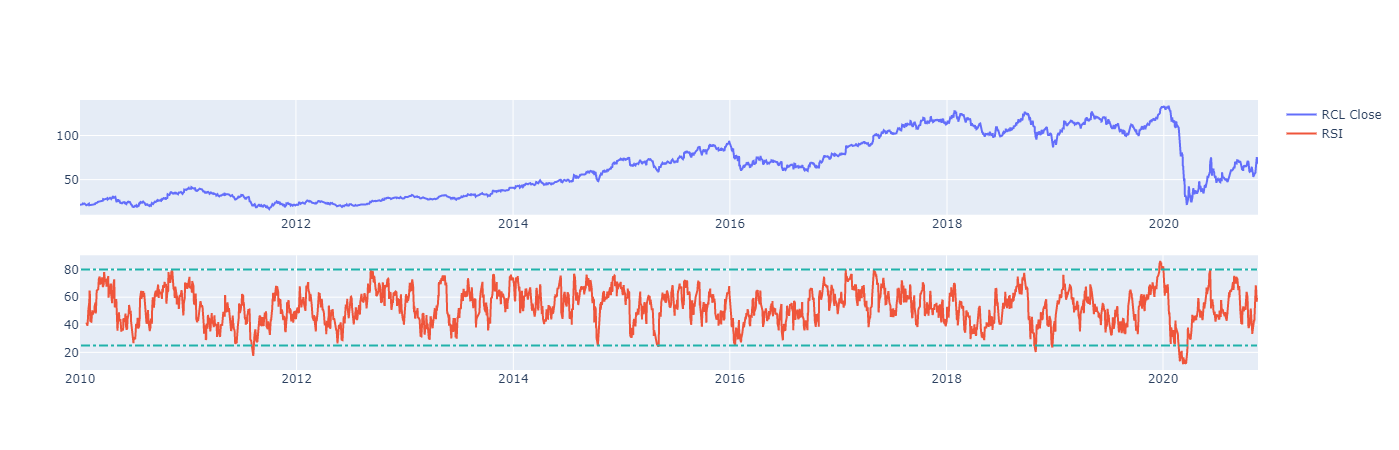

In [70]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=data.index, y=data["Adj Close"], name=ticker + " Close"), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data["rsi"], name="RSI"), row=2, col=1)
fig.add_shape(
            type="line",
            x0=data.index.min(),
            x1=data.index.max(),
            y0=rsi_upper,
            y1=rsi_upper,
            line=dict(
                color="LightSeaGreen",
                width=2,
                dash="dashdot",
            ), row=2, col=1
    )

fig.add_shape(
            type="line",
            x0=data.index.min(),
            x1=data.index.max(),
            y0=rsi_lower,
            y1=rsi_lower,
            line=dict(
                color="LightSeaGreen",
                width=2,
                dash="dashdot",
            ), row=2, col=1
    )

fig.show()

In [71]:
def sig_buysell(x):

    l = []
    
    for _, sig in x.iteritems():
        if sig == 0:
            l.append(None)
        elif sig == 1:
            l.append("Buy")
        elif sig == -1:
            l.append("Sell")
    return l

data['sig_bs'] = sig_buysell(data["signal"])
data

,High,Low,Open,Close,Volume,Adj Close,rsi,signal,sig_bs,action
Date,,,,,,,,,,
2010-01-04,26.280001,25.719999,26.139999,25.799999,2792600.0,21.423769,NaN,0,None,None
2010-01-05,26.500000,25.559999,26.110001,25.889999,3588900.0,21.498505,NaN,0,None,None
2010-01-06,25.950001,25.010000,25.900000,25.240000,4139600.0,20.958767,NaN,0,None,None
2010-01-07,25.719999,25.150000,25.469999,25.700001,3156200.0,21.340734,NaN,0,None,None
2010-01-08,25.959999,25.590000,25.750000,25.910000,2507700.0,21.515123,NaN,0,None,None
...,...,...,...,...,...,...,...,...,...,...
2020-11-09,78.860001,71.239998,73.269997,75.430000,27736800.0,75.430000,68.619003,0,None,None
2020-11-10,74.629997,71.360001,74.029999,73.730003,11446100.0,73.730003,65.665854,0,None,None
2020-11-11,73.919998,69.699997,73.809998,70.879997,10404000.0,70.879997,60.931454,0,None,None


In [72]:
def buysell(x):
    
    
    l = []
    
    last = x.iloc[0]
    cur = last
    l.append(cur)
    
    for _, sig in x[1:].iteritems():

        if sig != None and sig != cur:
            l.append(sig)
            cur = sig
        else:
            l.append(None)
        last = sig

    return l

data['action'] = buysell(data['sig_bs'])


In [73]:
data[data['action'].notnull()]

,High,Low,Open,Close,Volume,Adj Close,rsi,signal,sig_bs,action
Date,,,,,,,,,,
2011-08-04,27.969999,26.200001,27.910000,27.030001,7582800.0,22.445139,22.014404,1,Buy,Buy
2017-01-26,96.089996,92.279999,93.050003,95.639999,7610500.0,88.592598,80.247357,-1,Sell,Sell
2018-10-24,114.800003,106.540001,114.269997,106.970001,2977700.0,102.648277,24.591799,1,Buy,Buy
2019-12-20,132.490005,128.210007,128.929993,131.080002,4295700.0,129.791672,84.044758,-1,Sell,Sell
2020-02-24,101.000000,96.389999,99.949997,96.610001,7476900.0,95.660454,21.763224,1,Buy,Buy


In [74]:
def calcreturns(df, name="Historical"):

    # Back test with strategy
    good = False
    
    buy = 0
    sell = 0
    
    invested = 0
    realized = 0
    
    trips = 0
    trip_wins = 0
    trip_returns = []
      
    port_value = []
    
    for i, (date, row) in zip(range(len(df)),df.iterrows()):

        if row["action"] == "Buy":
            buy = df.iloc[i+1]["Open"]
            good = True

        elif row["action"] == "Sell" and good:
            sell = df.iloc[i+1]["Open"]
            invested += buy
            realized += df.iloc[i+1]["Open"]

            trips += 1
            
            profit = sell - buy
            trip_returns.append(profit)
            if profit > 0:
                trip_wins += 1
                
            buy = 0
            sell = 0
            
    trip_returns = np.array(trip_returns)
    sharpe = trip_returns.mean()/trip_returns.std()
    # Buy and hold
    
    bought = df.iloc[0]["Open"]
    hold = df.iloc[-1]["Adj Close"]
    bnh = hold - bought
    bnhsharpe = df["Adj Close"].mean()/df["Adj Close"].std()
    
    sp500 = pdr.get_data_yahoo("^GSPC", start=start, end=end)
    sp_return = (sp500.iloc[-1]["Adj Close"] - sp500.iloc[0]["Open"])/sp500.iloc[0]["Open"]*100
    spsharpe = sp500["Adj Close"].mean()/sp500["Adj Close"].std()
    
    
    performance = {"Round Trips": [trips], "Pct Trip Wins": [trip_wins/trips], "Pct Return": [round(((realized-invested)/invested)*100,3)], "Sharpe": [sharpe], "B&H Pct Return": [round((bnh)/bought*100, 3)],
                   "B&H Sharpe":[bnhsharpe], "Max Drawdown Pct": [((data["Adj Close"] - data["Adj Close"].cummax())/data["Adj Close"].cummax()).min().round(3)*100], "Max Drawdown Dollars": [(data["Adj Close"] - data["Close"].cummax()).min().round(3)],
                   "S&P 500 Pct Return": [round(sp_return,3)], "S&P 500 Sharpe": [spsharpe]}
    
    return pd.DataFrame(performance, index=[name])
    
# perf = calcreturns(data)

    

In [75]:
calcreturns(data)

,Round Trips,Pct Trip Wins,Pct Return,Sharpe,B&H Pct Return,B&H Sharpe,Max Drawdown Pct,Max Drawdown Dollars,S&P 500 Pct Return,S&P 500 Sharpe
Historical,2,1.0,65.949,2.040816,170.122,1.846954,-83.3,-112.72,221.089,3.137158


In [13]:
def bootsample(df, L=10):
    
    num_samples = round(len(df)/L)
    
    sample_points = np.random.randint(len(df)-L, size=num_samples)

    new_data = df.iloc[sample_points[0]:(sample_points[0]+L)]
    
    for i in sample_points[1:]:
        sample = df.iloc[i:(i+L)]

        new_data = new_data.append(sample, ignore_index=True)
    return new_data

In [61]:
bootsample(data).head(20)

,High,Low,Open,Close,Volume,Adj Close,rsi,signal,sig_bs,action
0,52.660000,51.540001,52.099998,52.040001,1162100.0,45.261833,47.704070,0,None,None
1,52.349998,51.070000,51.799999,51.580002,1310600.0,44.861748,45.017110,0,None,None
2,51.980000,51.180000,51.919998,51.369999,886200.0,44.679092,43.804045,0,None,None
3,52.799999,51.599998,51.680000,52.599998,1236400.0,45.748886,51.967824,0,None,None
4,52.820000,51.790001,52.799999,51.930000,835100.0,45.166157,47.886935,0,None,None
5,53.709999,52.400002,52.470001,52.849998,2803100.0,45.966331,53.308903,0,None,None
6,52.470001,50.959999,52.470001,51.950001,2020500.0,45.183556,48.042947,0,None,None
7,52.220001,50.650002,51.110001,51.900002,1687200.0,45.358341,49.248481,0,None,None
8,52.709999,51.369999,51.580002,52.610001,1062400.0,45.978859,53.383765,0,None,None
9,53.849998,52.400002,52.450001,53.000000,2754800.0,46.319691,55.527251,0,None,None


In [76]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

results = pd.DataFrame()

for i in range(10):
    try:
        perf = calcreturns(bootsample(data), name=f"B{i}")
        results = results.append(perf)
    except:
        pass


In [77]:
results

,Round Trips,Pct Trip Wins,Pct Return,Sharpe,B&H Pct Return,B&H Sharpe,Max Drawdown Pct,Max Drawdown Dollars,S&P 500 Pct Return,S&P 500 Sharpe
B0,1,0.000000,-11.556,-inf,-45.055,1.929527,-83.3,-112.72,221.089,3.137158
B2,2,0.500000,131.612,0.966069,100.745,1.925754,-83.3,-112.72,221.089,3.137158
B3,3,0.666667,73.736,1.081332,31.892,1.872983,-83.3,-112.72,221.089,3.137158
B7,3,1.000000,878.504,3.740908,107.816,1.975351,-83.3,-112.72,221.089,3.137158
B9,2,1.000000,17.234,1.382902,134.923,1.841968,-83.3,-112.72,221.089,3.137158


<AxesSubplot:>

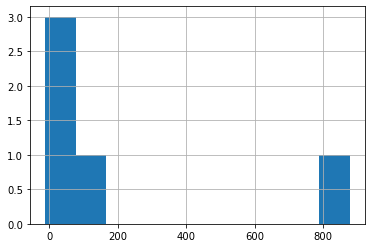

In [78]:
results['Pct Return'].hist()

In [79]:
results.mean()

Round Trips               2.200000
Pct Trip Wins             0.633333
Pct Return              217.906000
Sharpe                        -inf
B&H Pct Return           66.064200
B&H Sharpe                1.909117
Max Drawdown Pct        -83.300000
Max Drawdown Dollars   -112.720000
S&P 500 Pct Return      221.089000
S&P 500 Sharpe            3.137158
dtype: float64